Note book para desarrollar funciones

In [1]:
#Se importan los paquetes basico necesarios
import pandas as pd
import geopandas as gpd
import os       
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
from IPython.display import Markdown as md #Este paquete sirve para escribir párrafos que se modifican automáticamente
#import plotly
#import plotly.express as px
#import plotly.graph_objects as go
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
import mapclassify
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from shapely.geometry import box

#Se centran los outputs para que después haya un mejor display
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

import warnings
warnings.filterwarnings('ignore')

#Esto garantiza que se puedan ver los objetos de plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#init_notebook_mode(connected=True)

In [2]:
%config Completer.use_jedi = False
#The reason for this line of code is here https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

In [3]:
#sys.prefix
sys.path.append('OneDrive - C- ANALISIS SAS/programacion/funciones')

In [4]:
#Estilos para pandas
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
import mapas

In [14]:
paths = mapas.diccionario_rutas(path_OneDrive="C:/Users/User/OneDrive - C- ANALISIS SAS/")

In [15]:
#paths['rios']

gpd.read_file(paths['rios'])

#C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Geografia\rios

,FID_Area_e,Id,FID_hidrog,Id_1,tipo,OBJECTID,FEATURE_TY,geometry
0,0,0,1,0,1,1,500412,"MULTIPOLYGON (((741131.243 533889.853, 741171...."
1,0,0,2,0,1,2,500412,"POLYGON ((501775.487 629689.396, 501734.863 62..."
2,0,0,3,0,1,3,500412,"POLYGON ((665072.217 525712.647, 665068.871 52..."
3,0,0,16,0,1,16,500412,"POLYGON ((1590240.588 906470.369, 1590158.718 ..."
4,0,0,24,0,1,24,500412,"POLYGON ((1412786.933 73135.359, 1412787.615 7..."
...,...,...,...,...,...,...,...,...
232,0,0,1306,0,1,1306,500412,"MULTIPOLYGON (((1028693.310 1469525.988, 10286..."
233,0,0,1308,0,1,1308,500412,"POLYGON ((1598656.686 1170640.601, 1598609.561..."
234,0,0,1309,0,1,1309,500412,"MULTIPOLYGON (((1023818.203 1383574.340, 10238..."
235,0,0,1310,0,1,1310,500412,"MULTIPOLYGON (((672973.294 1286579.068, 672942..."


In [16]:
def indice_municipio(cod_mpio):
    """Retorna la fila que corresponde al municipio en el archivo 'municipos' del diccionario paths.
        Parametros:
            cod_mpio (str): Código del municipio en formato string"""
    inds = pd.read_csv(paths['municipios_indices'], 
                      dtype={'DPTOMPIO':str},
                      index_col=0)
    ind = inds[inds['DPTOMPIO']==cod_mpio]

    return ind.index.to_list()[0]+1

In [17]:
def mapa_municipal(cod_mpio,
                   año='2019',
                   coca='coca19', 
                   emf_ano='2019', 
                   vias=True, 
                   figsize=(15, 15), 
                   vrds=True, 
                   rios=True,
                    aurbana=True,
                  pnn=True,
                  minas=True,
                  pnis=True,
                    cca=True,
                   rsg=True,
                   zf=True,
                  title='.'):
    """Retorna un mapa de matplot lib con el municipio y las diferentes capas resaltadas.
            Parametros:
                cod_mpio (str): Código del municipio en formato string
                coca (str): Nombre las capas de coca de 2001-19, escrito como cocaYY
                emf (str): Year for the EMF (manual erradication) layer (data from 2016)
                vrds (Bool): True to show the borders and names of veredas. Default is true. 
                minas (Bool): True to show the points with accidents due to Land Mines (last 5 years). Default is true. 
                figsize : tuple of integers (default None)
                        Size of the resulting matplotlib.figure.Figure. If the argument
                        axes is given explicitly, figsize is ignored."""
    
    row=indice_municipio(cod_mpio)
    df = mapas.cargar_capa_individual(paths['municipios'], rows=slice(row-1,row))
    bbx = df.envelope
    
    #df = mpios[mpios['DPTOMPIO']==cod_mpio]
    fig, ax = plt.subplots(figsize=figsize)

    #Get the bounding box to cut the other layers
    #df = mapas.cargar_capa_individual(paths['municipios'], maks=bbx)
    df.plot(ax=ax, color='white', alpha=0.01)
    df.boundary.plot(ax=ax, color='black')  #Bounds
    df.apply(lambda x: ax.annotate(s=x['NOMB_MPIO'], xy=x.geometry.centroid.coords[0], ha='center', color='black', fontsize=10),axis=1)
    #Load jurisdiction layers
    legend_patches = [] #List to store legend patches
    if pnn==True:
        pnn = mapas.cargar_capa_individual(paths['pnn'], mask=bbx)
        pnn.plot(ax=ax, color='limegreen', alpha=0.5)
        #Add label
        pnn.apply(lambda x: ax.annotate(s=x['NOM_PARQ'], 
                                         xy=x.geometry.centroid.coords[0], 
                                         ha='center', 
                                         color='forestgreen', 
                                         fontsize=10),
                   axis=1)
        pnn_legend = mpatches.Patch(color='limegreen', label='Parque Nacional') 
        legend_patches = legend_patches + [pnn_legend]
    if cca==True:
        cca = mapas.cargar_capa_individual(paths['consejos'], mask=bbx)
        cca.plot(ax=ax, color='peru', alpha=0.5)
        #Add label
        cca.apply(lambda x: ax.annotate(s=x['NOMBRE'], 
                                         xy=x.geometry.centroid.coords[0], 
                                         ha='center', 
                                         color='saddlebrown', 
                                         fontsize=7, 
                                        alpha=0.7),
                   axis=1)
        cca_legend = mpatches.Patch(color='peru', label='CC Afro') 
        legend_patches = legend_patches + [cca_legend]
    if rsg==True:
        rsg = mapas.cargar_capa_individual(paths['resguardos'], mask=bbx)
        rsg.plot(ax=ax, color='palevioletred', alpha=0.5)
        #Add label
        rsg.apply(lambda x: ax.annotate(s=x['NOM_RESG'], 
                                         xy=x.geometry.centroid.coords[0], 
                                         ha='center', 
                                         color='saddlebrown', 
                                         fontsize=7,
                                           alpha=0.7),
                   axis=1)
        rsg_legend = mpatches.Patch(color='palevioletred', label='Resguardo') 
        legend_patches = legend_patches + [rsg_legend]
    if zf==True:
        zf = mapas.cargar_capa_individual(paths['zonas_futuro'], mask=bbx)
        zf.plot(ax=ax, color='lightsteelblue', alpha=0.5)
        zf_legend = mpatches.Patch(color='lightsteelblue', label='Zona Futuro') 
        legend_patches = legend_patches + [zf_legend]
    #Se establecen los límites del mapa con base en los límites del municipio
    b = df.total_bounds
    ax.set_xlim(b[0]-100, b[2]+100)
    ax.set_ylim(b[1]-100, b[3]+100)

    #Se cargan las capas
    coca = mapas.cargar_capa_individual(paths[coca], mask=bbx) #Coca
    coca.plot(ax=ax, column='areacoca', cmap='Reds', alpha=0.5)
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=mpl.colors.Normalize(0,100))
    fig.colorbar(sm, ax=ax, label='Hectáreas de coca', aspect=60, fraction=0.046, pad=0.04)
    if vrds==True:
        vrds = mapas.cargar_capa_individual(paths['vrds'], mask=df) #Veredas
        vrds.plot(ax=ax, edgecolor='grey', alpha=0.001)  
        #Labels for veredas
        vrds.apply(lambda x: ax.annotate(s=x['NOMBRE_VER'], xy=x.geometry.centroid.coords[0], ha='center', color='grey', fontsize=7),axis=1);
        vrds.boundary.plot(ax=ax, color='grey', linestyle='--') #Draw boundaries for veredas
    #EMF
    emf = mapas.cargar_capa_individual(paths['emf'], mask=bbx)
    emf['FECHA'] = pd.to_datetime(emf['FECHA'])
    emf.set_index('FECHA', inplace=True)
    emf = emf[emf_ano]
    emf.plot(ax=ax, color='green', marker=".",markersize=10, alpha=0.4)
    emf_legend = mpatches.Patch(color='green', label='EMF')
    legend_patches = legend_patches + [emf_legend]
    
    #Add the rivers layer
    if rios==True:
        rios = mapas.cargar_capa_individual(paths['rios'], mask=bbx)
        rios.plot(ax=ax, color='turquoise')    
    if vias==True:
        vias = mapas.cargar_capa_individual(paths['vias'], mask=bbx)
        vias.plot(ax=ax, color='yellow')  
        vias_legend = mpatches.Patch(color='yellow', label='Vías')
        legend_patches = legend_patches + [vias_legend]
    if aurbana==True:
        aurbana = mapas.cargar_capa_individual(paths['aurbana'], mask=bbx)
        aurbana.plot(ax=ax, color='grey')
        aurbana_legend = mpatches.Patch(color='grey', label='Área Urbana') 
        legend_patches = legend_patches + [aurbana_legend]
    if minas == True:
        minas = mapas.cargar_capa_individual(paths['map'], mask=bbx)
        minas.plot(ax=ax, color='purple', marker=".",markersize=1, alpha=0.3)
        minas_legend = mpatches.Patch(color='purple', label='MAP')
        legend_patches = legend_patches + [minas_legend]
    if pnis == True:
        pnis = mapas.cargar_capa_individual(paths['lotes2020'], mask=bbx)
        pnis.plot(ax=ax, color='blue', marker=".",markersize=10, alpha=0.4)
        pnis_legend = mpatches.Patch(color='blue', label='Lotes PNIS')
        legend_patches = legend_patches + [pnis_legend]
    #df2.plot(ax=fig, figsize=(10, 10), color='grey', alpha=0.5)

    #Titulo
    municipio = df['NOMB_MPIO'].iloc[0].capitalize()
    depto = df['NOM_DEP'].iloc[0].capitalize()
    if title!= '.':
        ax.set_title(title, fontdict={'fontsize': 16})
    title = 'Mapa diagnóstico del municipio de {}, {} ({})'.format(municipio, depto, año)
    ax.set_title(title,
                fontdict={'fontsize': 16})

    #Se grafica el lote con base en las coordenadas recibidas
    ctx.add_basemap(ax=ax, crs=df.crs.to_string())
    ax.set_axis_off()

    #Legenda
    #veredas_municipo = mpatches.Patch(color='green', label='Coca en 20'.format(coca[-2:]))
    #vereda = mpatches.Patch(color='grey', label='Vereda en la que se ubica el lote')
   
    plt.legend(handles=legend_patches)
    
    return ax   
                                    

Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\ADMINISTRATIVO\VRDS_MPIO_POLITICO.shp
The function got to the end
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\Parques_Nacionales_Naturales.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\Consejos_comunitarios.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\Resguardos_Indigenas.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\zonas_futuro\zonas_futuro.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C-

<AxesSubplot:title={'center':'Mapa diagnóstico del municipio de Puerto asís, Putumayo (2019)'}>

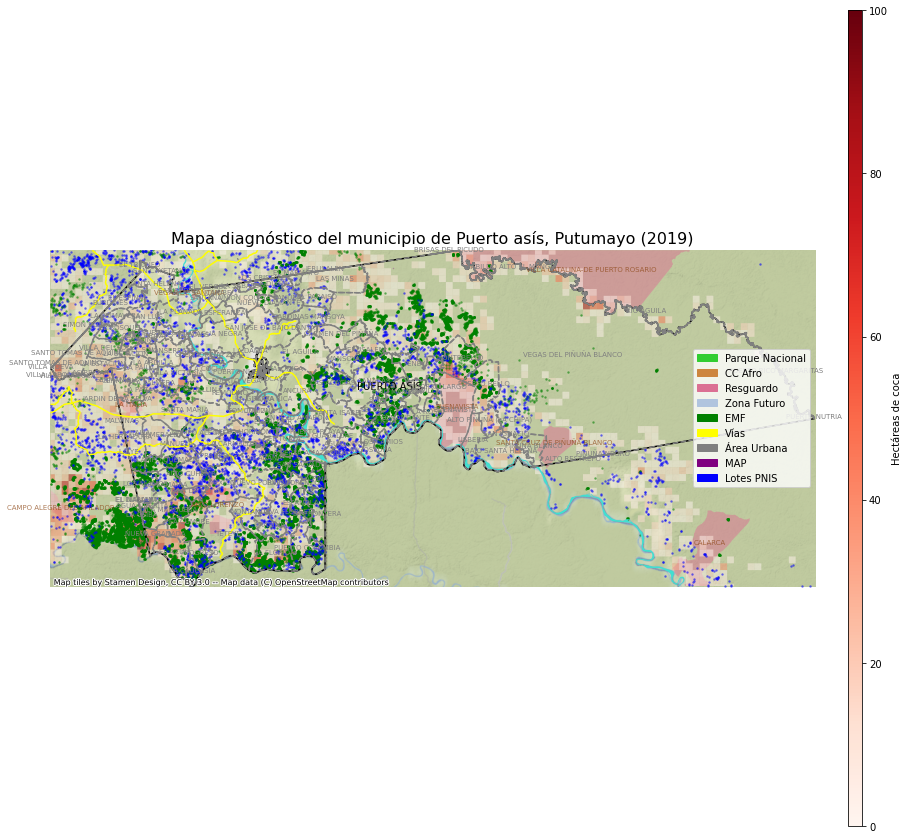

In [23]:
mapa_municipal('86568')

Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\ADMINISTRATIVO\VRDS_MPIO_POLITICO.shp
The function got to the end
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\Parques_Nacionales_Naturales.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\Consejos_comunitarios.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\Resguardos_Indigenas.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C- ANALISIS SAS\programacion\geoinfo\Colombia\Territoriales\zonas_futuro\zonas_futuro.shp
Final layer clipped to the mask extent for accuracy
Cargando capa
Ajustando capa C:\Users\User\OneDrive - C-

<AxesSubplot:title={'center':'Mapa diagnóstico del municipio de Buenaventura, Valle del cauca (2017)'}>

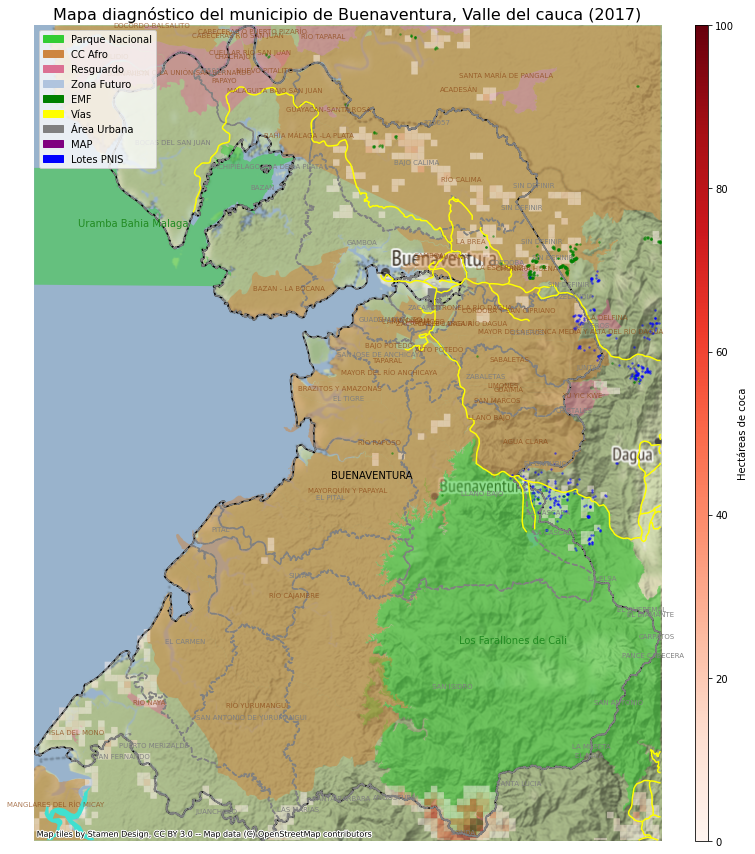

In [19]:
mapa_municipal('76109', año=2017, coca='coca17', emf_ano='2017')

In [20]:
def mapa_regional(shape_region,
                   año='2019',
                   coca='coca19', 
                   emf_ano='2019', 
                   vias=True, 
                   figsize=(15, 15), 
                   vrds=True, 
                   rios=True,
                    aurbana=True,
                  pnn=True,
                  minas=True,
                  pnis=True,
                    cca=True,
                   rsg=True,
                   zf=True,
                  title='.'):
    """Retorna un mapa de matplot lib con el municipio y las diferentes capas resaltadas.
            Parametros:
                shape_region (gdf): Geodataframe with the region of interest
                coca (str): Nombre las capas de coca de 2001-19, escrito como cocaYY
                emf (str): Year for the EMF (manual erradication) layer (data from 2016)
                vrds (Bool): True to show the borders and names of veredas. Default is true. 
                minas (Bool): True to show the points with accidents due to Land Mines (last 5 years). Default is true. 
                figsize : tuple of integers (default None)
                        Size of the resulting matplotlib.figure.Figure. If the argument
                        axes is given explicitly, figsize is ignored."""
    df = mapas.cargar_capa_individual(paths['municipios'], mask=shape_region)
    bbx = box(*df.total_bounds)
    
    #df = mpios[mpios['DPTOMPIO']==cod_mpio]
    fig, ax = plt.subplots(figsize=figsize)

    #Get the bounding box to cut the other layers
    #df = mapas.cargar_capa_individual(paths['municipios'], maks=bbx)
    df.plot(ax=ax, color='white', alpha=0.01)
    df.boundary.plot(ax=ax, color='black')  #Bounds
    df.apply(lambda x: ax.annotate(s=x['NOMB_MPIO'], xy=x.geometry.centroid.coords[0], ha='center', color='black', fontsize=10),axis=1)
    #Load jurisdiction layers
    legend_patches = [] #List to store legend patches
    if pnn==True:
        pnn = mapas.cargar_capa_individual(paths['pnn'], mask=bbx)
        pnn.plot(ax=ax, color='limegreen', alpha=0.5)
        #Add label
        pnn.apply(lambda x: ax.annotate(s=x['NOM_PARQ'], 
                                         xy=x.geometry.centroid.coords[0], 
                                         ha='center', 
                                         color='forestgreen', 
                                         fontsize=10),
                   axis=1)
        pnn_legend = mpatches.Patch(color='limegreen', label='Parque Nacional') 
        legend_patches = legend_patches + [pnn_legend]
    if cca==True:
        cca = mapas.cargar_capa_individual(paths['consejos'], mask=bbx)
        cca.plot(ax=ax, color='peru', alpha=0.5)
        #Add label
        cca.apply(lambda x: ax.annotate(s=x['NOMBRE'], 
                                         xy=x.geometry.centroid.coords[0], 
                                         ha='center', 
                                         color='saddlebrown', 
                                         fontsize=7, 
                                        alpha=0.7),
                   axis=1)
        cca_legend = mpatches.Patch(color='peru', label='CC Afro') 
        legend_patches = legend_patches + [cca_legend]
    if rsg==True:
        rsg = mapas.cargar_capa_individual(paths['resguardos'], mask=bbx)
        rsg.plot(ax=ax, color='palevioletred', alpha=0.5)
        #Add label
        rsg.apply(lambda x: ax.annotate(s=x['NOM_RESG'], 
                                         xy=x.geometry.centroid.coords[0], 
                                         ha='center', 
                                         color='saddlebrown', 
                                         fontsize=7,
                                           alpha=0.7),
                   axis=1)
        rsg_legend = mpatches.Patch(color='palevioletred', label='Resguardo') 
        legend_patches = legend_patches + [rsg_legend]
    if zf==True:
        zf = mapas.cargar_capa_individual(paths['zonas_futuro'], mask=bbx)
        zf.plot(ax=ax, color='lightsteelblue', alpha=0.5)
        zf_legend = mpatches.Patch(color='lightsteelblue', label='Zona Futuro') 
        legend_patches = legend_patches + [zf_legend]
    #Se establecen los límites del mapa con base en los límites del municipio
    b = df.total_bounds
    ax.set_xlim(b[0]-100, b[2]+100)
    ax.set_ylim(b[1]-100, b[3]+100)

    #Se cargan las capas
    coca = mapas.cargar_capa_individual(paths[coca], mask=bbx) #Coca
    coca.plot(ax=ax, column='areacoca', cmap='Reds', alpha=0.5)
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=mpl.colors.Normalize(0,100))
    fig.colorbar(sm, ax=ax, label='Hectáreas de coca', aspect=60, fraction=0.046, pad=0.04)
    if vrds==True:
        vrds = mapas.cargar_capa_individual(paths['vrds'], mask=df) #Veredas
        vrds.plot(ax=ax, edgecolor='grey', alpha=0.001)  
        #Labels for veredas
        vrds.apply(lambda x: ax.annotate(s=x['NOMBRE_VER'], xy=x.geometry.centroid.coords[0], ha='center', color='grey', fontsize=7),axis=1);
        vrds.boundary.plot(ax=ax, color='grey', linestyle='--') #Draw boundaries for veredas
    #EMF
    emf = mapas.cargar_capa_individual(paths['emf'], mask=bbx)
    emf['FECHA'] = pd.to_datetime(emf['FECHA'])
    emf.set_index('FECHA', inplace=True)
    emf = emf[emf_ano]
    emf.plot(ax=ax, color='green', marker=".",markersize=1, alpha=0.4)
    emf_legend = mpatches.Patch(color='green', label='EMF')
    legend_patches = legend_patches + [emf_legend]
    
    #Add the rivers layer
    if rios==True:
        rios = mapas.cargar_capa_individual(paths['rios'], mask=bbx)
        rios.plot(ax=ax, color='turquoise')    
    if vias==True:
        vias = mapas.cargar_capa_individual(paths['vias'], mask=bbx)
        vias.plot(ax=ax, color='yellow')  
        vias_legend = mpatches.Patch(color='yellow', label='Vías')
        legend_patches = legend_patches + [vias_legend]
    if aurbana==True:
        aurbana = mapas.cargar_capa_individual(paths['aurbana'], mask=bbx)
        aurbana.plot(ax=ax, color='grey')
        aurbana_legend = mpatches.Patch(color='grey', label='Área Urbana') 
        legend_patches = legend_patches + [aurbana_legend]
    if minas == True:
        minas = mapas.cargar_capa_individual(paths['map'], mask=bbx)
        minas.plot(ax=ax, color='purple', marker=".",markersize=1, alpha=0.3)
        minas_legend = mpatches.Patch(color='purple', label='MAP')
        legend_patches = legend_patches + [minas_legend]
    if pnis == True:
        pnis = mapas.cargar_capa_individual(paths['lotes2020'], mask=bbx)
        pnis.plot(ax=ax, color='blue', marker=".",markersize=1, alpha=0.4)
        pnis_legend = mpatches.Patch(color='blue', label='Lotes PNIS')
        legend_patches = legend_patches + [pnis_legend]
    #df2.plot(ax=fig, figsize=(10, 10), color='grey', alpha=0.5)

    #Titulo
    municipio = df['NOMB_MPIO'].iloc[0].capitalize()
    depto = df['NOM_DEP'].iloc[0].capitalize()
    if title!= '.':
        ax.set_title(title, fontdict={'fontsize': 16})
    #title = 'Mapa diagnóstico del municipio de {}, {} ({})'.format(municipio, depto, año)
    #ax.set_title(title, fontdict={'fontsize': 16})

    #Se grafica el lote con base en las coordenadas recibidas
    ctx.add_basemap(ax=ax, crs=df.crs.to_string())
    ax.set_axis_off()

    #Legenda
    #veredas_municipo = mpatches.Patch(color='green', label='Coca en 20'.format(coca[-2:]))
    #vereda = mpatches.Patch(color='grey', label='Vereda en la que se ubica el lote')
   
    plt.legend(handles=legend_patches)
    
    return ax   
                                    

In [93]:
#Cargar las regiones 

df = pd.read_excel(paths['panel_municipal_pgn'], skiprows=2, converters={'ID_MPIOS  (DANE)':str})
df['codane'] = df['ID_MPIOS  (DANE)'].apply(lambda x: '0'+str(x) if len(str(x))<5 else x) #Fix the municipal codes


In [94]:
bca = df[df['Nombre                                  del PDET']=='Bajo Cauca y nordeste antioqueno']['codane'].to_list()

In [95]:
mpios = mapas.cargar_capa_individual(paths['municipios'])

Cargando capa
Ajustando capa VRDS_MPIO_POLITICO.shp
The function got to the end


In [96]:
mpios.head()

,DPTOMPIO,NOMB_MPIO,NOM_DEP,COD_DPTO,geometry
0,05001,MEDELLÍN,ANTIOQUIA,05,"MULTIPOLYGON (((838458.583 1174879.949, 838479..."
1,05002,ABEJORRAL,ANTIOQUIA,05,"POLYGON ((848956.558 1120747.217, 848934.665 1..."
2,05004,ABRIAQUÍ,ANTIOQUIA,05,"POLYGON ((785915.331 1223099.070, 785910.224 1..."
3,05021,ALEJANDRÍA,ANTIOQUIA,05,"POLYGON ((888526.618 1191914.597, 888529.200 1..."
4,05030,AMAGÁ,ANTIOQUIA,05,"POLYGON ((820996.348 1153902.414, 820989.078 1..."


In [97]:
shp = mpios[mpios['DPTOMPIO'].isin(bca)] #GeoDataFrame que cubre los municipios de interés

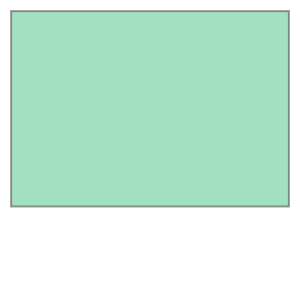

In [106]:
mapas.cargar_capa_individual(box(*shp.total_bounds)

In [98]:
mapa_regional(shp, title='Mapa Diagnóstico Regional del Bajo Cauca - 2019', vrds=False, figsize=(20,20))

Cargando capa
Ajustando capa VRDS_MPIO_POLITICO.shp
Empty polygons dropped
Final layer clipped to the mask extent for accuracy


ValueError: DataFrame constructor not properly called!